Data source:

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

  Available at: [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Brief inspection of the data:

In [3]:
bank_data = pd.read_csv("bank-additional-full.csv", sep=';')
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


No missing data:

In [4]:
# see the type of each attribute + how many observations in each

bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [5]:
# quick overview of numerical attributes

bank_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Numerical attributes:
- 'campaign', 'duration' and 'previous' are all right skewed. In other words, the majority of customers were contacted few times (<3), for approximately 2-3 minutes and had not been contacted in a previous campaign.
- 'pdays' and 'previous' don't appear to take on many distinct values.
- 'pdays' values of 999 need to be corrected for somehow.

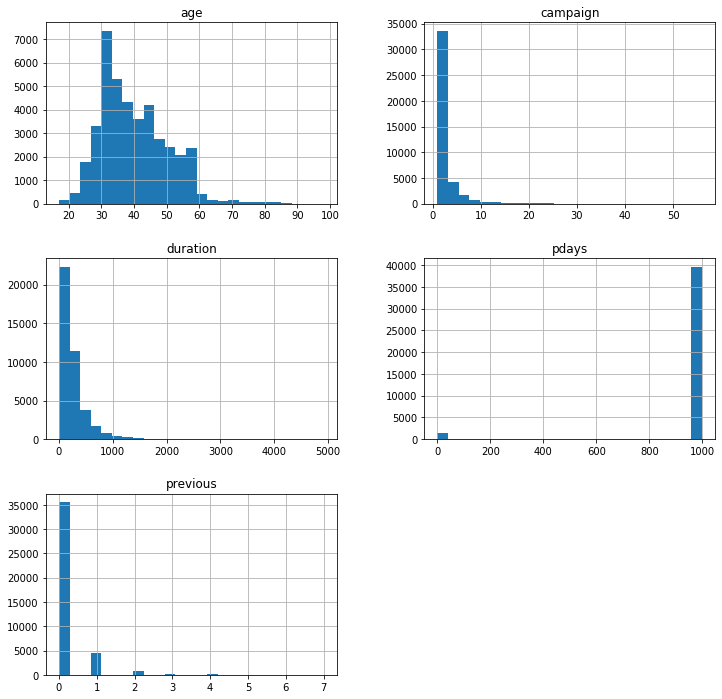

In [411]:
# histograms of numerical attributes

bank_data[['age', 'duration', 'campaign', 'pdays', 'previous']].hist(bins=25, figsize=(12,12));

In [398]:
# # 'previous days', 'campaign' and 'previous' has many sparse classes. it should be truncated.
# print("Previous days:", bank_data['pdays'].unique(), "\n")
# print("Previous days value counts:\n", bank_data['pdays'].value_counts().sort_index(), "\n")

# # 'campaign' also has too many sparse classes
# print("Campaign value counts:\n", train_set['campaign'].value_counts())

# # 'previous' also has too many sparse classes
# print("Campaign value counts:\n", train_set['previous'].value_counts())

Categorical attributes:
- The 'unknown' category shows that there is missing data.
- There are some sparse classes, e.g. 'unknown' for marital, housing, loan + 'illiterate' for education + the later months in year + 'yes' for default + >1 (maybe 2) for previous

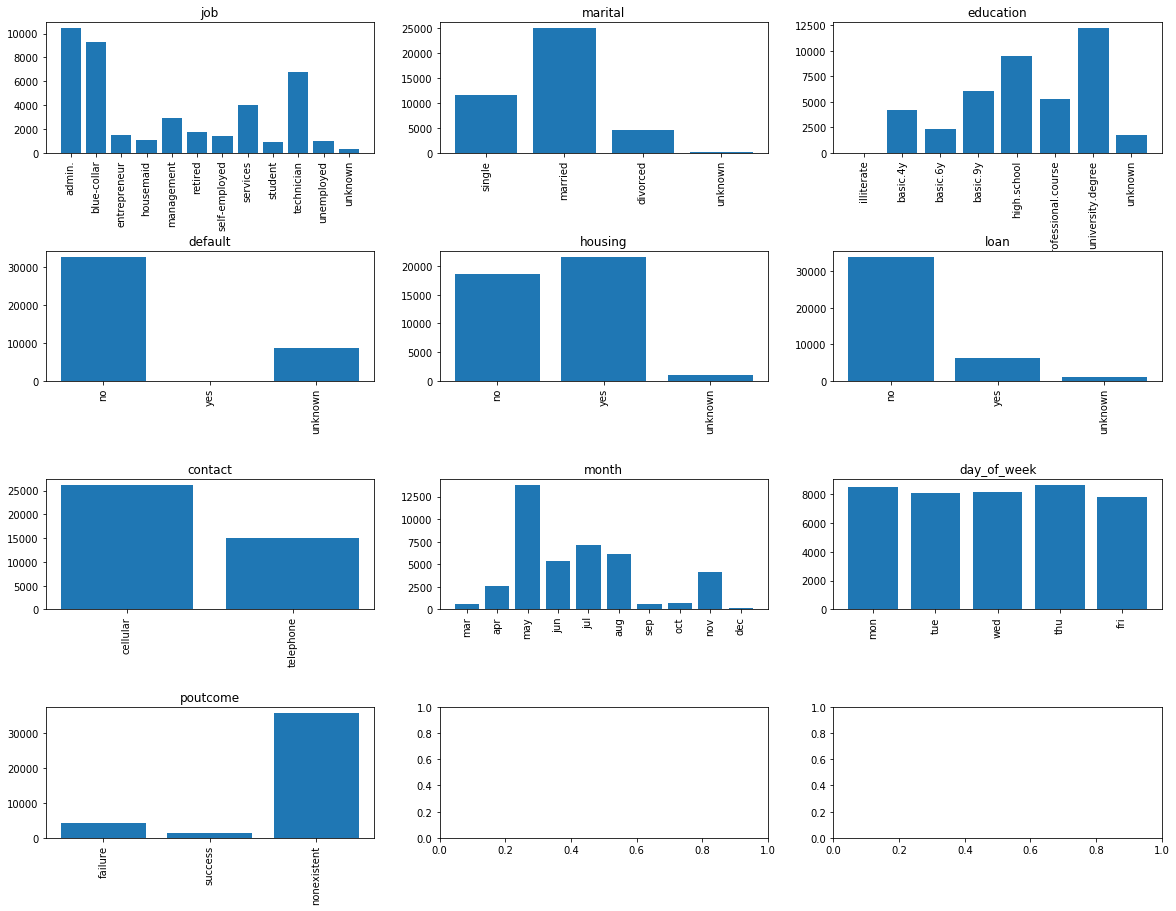

In [409]:
categorical_attribs = list(bank_data.columns[[type(bank_data[column][1])==str for column in bank_data.columns]])

fig, ax = plt.subplots(4, 3, figsize=(20,15));
fig.subplots_adjust(hspace=0.75, wspace=0.2);

for attrib in bank_data[categorical_attribs[:-1]]:
    i = categorical_attribs.index(attrib)
    counts = categorical_data[attrib].value_counts().sort_index()
    ax[int(i / 3), i - 3*int(i/3)].bar(counts.index, counts)
    for tick in ax[int(i / 3), i - 3*int(i/3)].get_xticklabels():
        tick.set_rotation(90)
    ax[int(i / 3), i - 3*int(i/3)].set_title(attrib)

### Create a test set now (to avoid data snooping bias)

In [400]:
# This data set is large enough to not use stratified sampling (although some of the sparse classes may not be
# represented in the test set but will fix with feature engineering later)

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(bank_data, test_size = 0.2, random_state = 0)

### Explore the data:

In [412]:
numerical_attribs = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                     'euribor3m', 'nr.employed', 'y']
numerical_data = train_set[numerical_attribs].copy()
numerical_data.loc[numerical_data['pdays']==999, 'pdays'] = 0 

numerical_data.loc[numerical_data['y']=='yes', 'y'] = 1
numerical_data.loc[numerical_data['y']=='no', 'y'] = 0

individual_numeric = numerical_data[['age', 'duration', 'campaign', 'previous', 'pdays']]
market_numeric = numerical_data[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]

Per the below box plots:
- duration is clearly related to the response but we can't use this attribute as outlined in the specs
- campaign may be negatively related to the response (people who signed up were called less times during this campaign on average). However it looks like people who said yes may have been called more times on the previous campaign. I.e. people who were called more times on the previous campaign may have required less calls to obtain a yes this time.
- the broader market indicators appear to be related to the response
- it appears that median euribor3m, consumer price index and employment are all lower at the time when people sign up for term deposits. However, this data is from 2008-2010 which is the global financial crisis. At this time, stock markets were crashing and the future of the economy was uncertain. Hence, a lot of people were seeking safety for their money in term deposits. The relationship (and direction of the relationship) between the 3 mentioned variables and the response may be specific to this period and may not generalise well to other periods. Perhaps all 3 variables should be combined into some kind of 'economic conditions' categorical variable
- nr.employed is related to the response but I don't know what this attribute represents

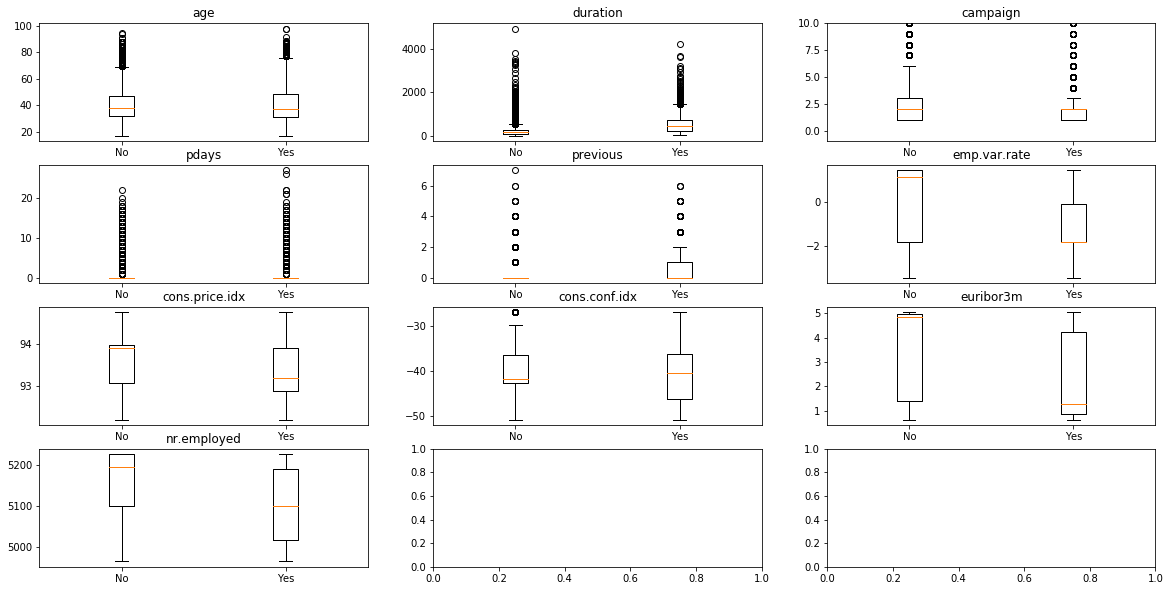

In [413]:
fig, ax = plt.subplots(4, 3, figsize=(20,10));
fig.subplots_adjust(hspace=0.2, wspace=0.2);

for attrib in numerical_attribs[0:10]:
    i = numerical_attribs.index(attrib)
    no = numerical_data.loc[numerical_data['y']==0, attrib]
    yes = numerical_data.loc[numerical_data['y']==1, attrib]
    ax[int(i / 3), i - 3*int(i/3)].boxplot([no, yes]);
    ax[int(i / 3), i - 3*int(i/3)].set_title(attrib);
    ax[int(i / 3), i - 3*int(i/3)].set_xticklabels(['No', 'Yes']);

ax[0,2].set_ylim(-1,10);

Multicollinearity does not appear to be a problem for the individual numerical attributes (campaign and duration are related but duration cannot be used in the analysis):

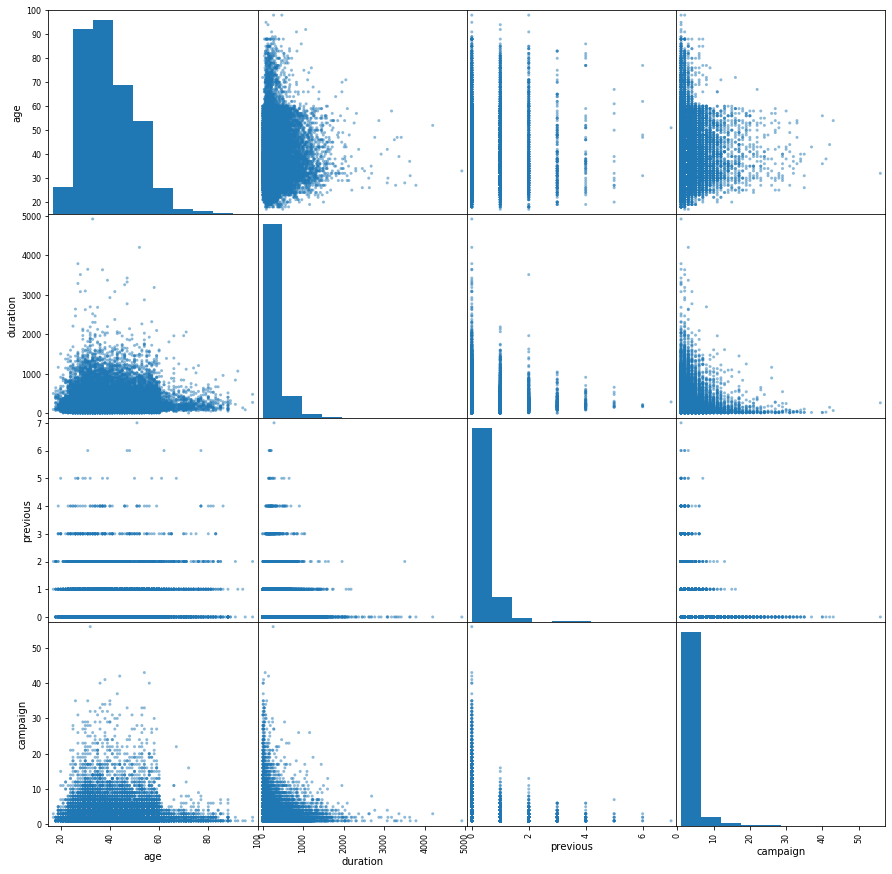

In [285]:
from pandas.plotting import scatter_matrix

# plot numerical attributes relating to individuals
scatter_matrix(individual_numeric, figsize=(15,15));

In [286]:
individual_numeric.corr()

,age,duration,previous,campaign
age,1.000000,-0.000627,0.023667,0.003993
duration,-0.000627,1.000000,0.019444,-0.069326
previous,0.023667,0.019444,1.000000,-0.079076
campaign,0.003993,-0.069326,-0.079076,1.000000


For the market attributes; Euribor3m, emp.var.rate and cons.price.index are all highly correlated with each other. This data is from a very specific period (the GFC) so it is unclear how results from using these variables will generalise to other time periods. As discussed, will combine these 3 attributes into a broader 'economic conditions' attribute

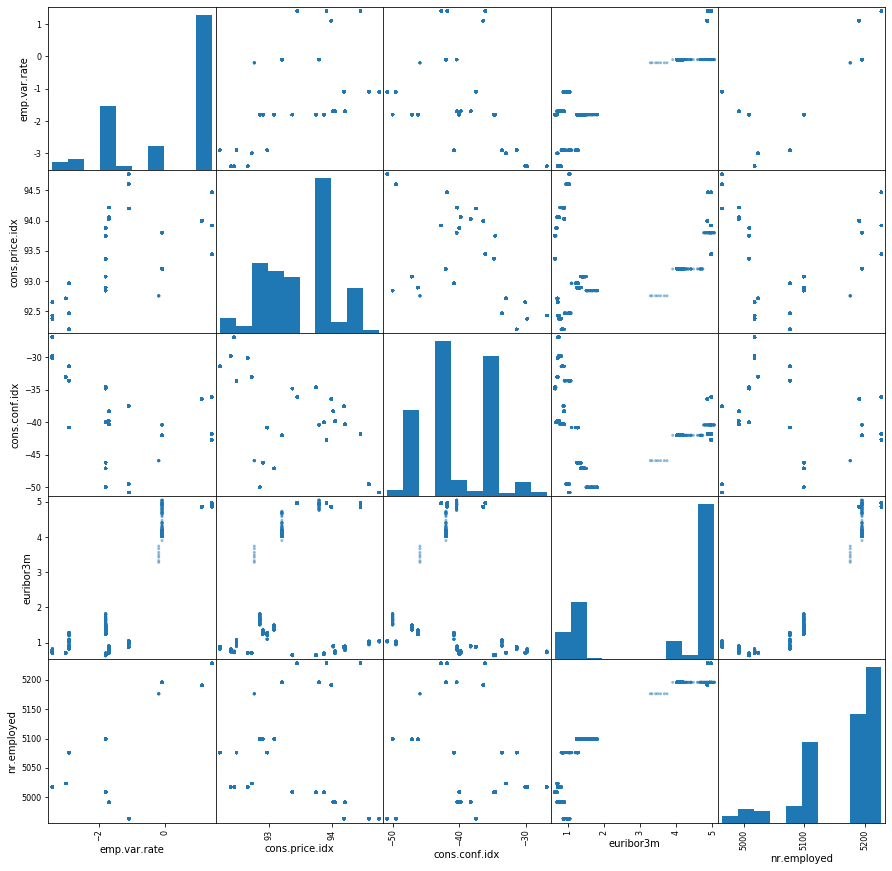

In [151]:
# plot numerical attributes relating to the broader market
scatter_matrix(market_numeric, figsize=(15,15));

In [152]:
market_numeric.corr()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
emp.var.rate,1.000000,0.774772,0.193186,0.972159,0.906623
cons.price.idx,0.774772,1.000000,0.055970,0.687399,0.520501
cons.conf.idx,0.193186,0.055970,1.000000,0.275381,0.099334
euribor3m,0.972159,0.687399,0.275381,1.000000,0.945120
nr.employed,0.906623,0.520501,0.099334,0.945120,1.000000


In [414]:
# quick overview of categorical attributes (including 'previous' as it only has 8 possible
# values so it's relationship with the response is easier to see as a bar chart)

categorical_attribs = list(train_set.columns[[type(bank_data[column][1])==str for column in bank_data.columns]])
categorical_attribs.insert(-1, 'previous')
categorical_data = bank_data[categorical_attribs].copy() # work on a copy

categorical_data['marital'] = pd.Categorical(categorical_data['marital'],
                                             categories=["single", "married", "divorced","unknown"],
                                             ordered=True)
categorical_data['education'] = pd.Categorical(categorical_data['education'],
                                             categories=["illiterate", "basic.4y", "basic.6y","basic.9y",
                                                        "high.school", "professional.course", "university.degree",
                                                        "unknown"],
                                             ordered=True)
categorical_data['month'] = pd.Categorical(categorical_data['month'],
                                             categories=['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
                                             ordered=True)
categorical_data['day_of_week'] = pd.Categorical(categorical_data['day_of_week'], categories=['mon', 'tue', 'wed', 'thu', 'fri'],
                                             ordered=True)
categorical_data['default'] = pd.Categorical(categorical_data['default'], categories=["no", "yes","unknown"], ordered=True)
categorical_data['housing'] = pd.Categorical(categorical_data['housing'], categories=["no", "yes","unknown"], ordered=True)
categorical_data['loan'] = pd.Categorical(categorical_data['loan'], categories=["no", "yes","unknown"], ordered=True)
categorical_data['poutcome'] = pd.Categorical(categorical_data['poutcome'], 
                                              categories=["failure", "success", "nonexistent"], ordered=True)

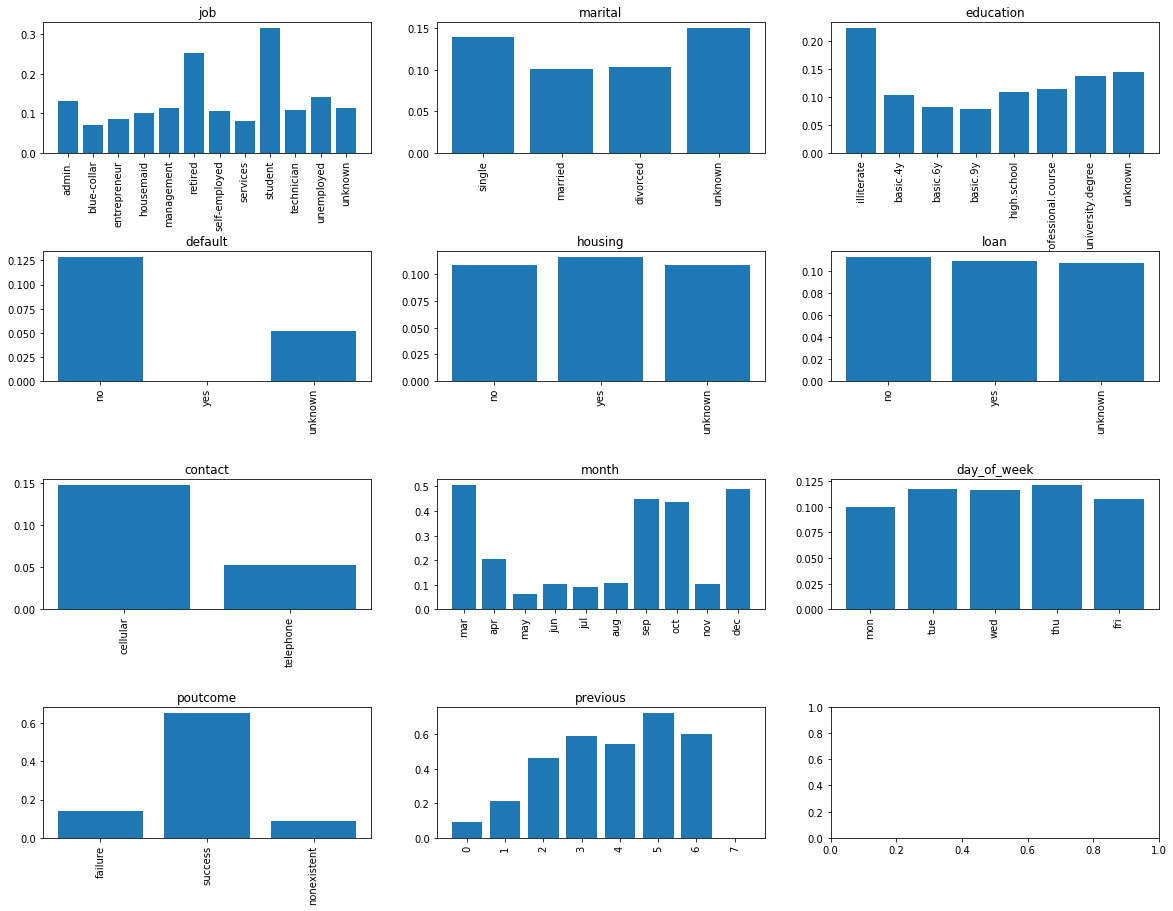

In [407]:
fig, ax = plt.subplots(4, 3, figsize=(20,15));
fig.subplots_adjust(hspace=0.75, wspace=0.2);

for attrib in categorical_attribs[:-1]:
    i = categorical_attribs.index(attrib)
    
    yes_no = pd.crosstab(index=categorical_data[attrib], columns=categorical_data['y'], values='y', 
                     aggfunc=np.size, normalize='index')
    
    ax[int(i / 3), i - 3*int(i/3)].bar(yes_no.index, yes_no['yes'])
    for tick in ax[int(i / 3), i - 3*int(i/3)].get_xticklabels():
        tick.set_rotation(90)
    ax[int(i / 3), i - 3*int(i/3)].set_title(attrib)

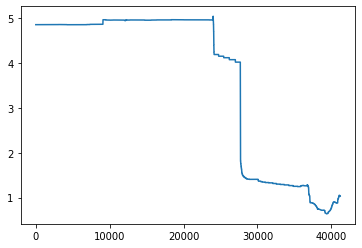

In [547]:
# LOOK AT THESE TIME SERIES VERSUS CUMULATIVE 'yes' or 'yes' % by year?

plt.plot(bank_data['euribor3m']);

### Clean the data:

In [551]:
# keep 'unknown' in as a category for now

# possibly remove sparse classes

### Feature engineering:

In [593]:
def preprocess(data):
    data_processed = data.copy()
    
    # drop irelevant attributes
    data_processed.drop(columns = ['duration', 'marital', 'housing', 'loan', 'day_of_week',
                                  'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], inplace=True)
    #data_processed.drop(columns = ['duration', 'marital', 'housing', 'loan', 'day_of_week'], inplace=True)

    # fix pdays 999 values (DATA CLEANING!)
    data_processed.loc[data_processed['pdays'] == 999, 'pdays'] = 0
    
    # create an 'economic conditions' attribute (1 for good, 0 for bad)
#     data_processed.rename(columns={'emp.var.rate' : 'economic_conditions'}, inplace=True)
#     data_processed.loc[data_processed['economic_conditions'] > 0, 'economic_conditions'] = 'Good'
#     data_processed.loc[data_processed['economic_conditions'] != 'Good', 'economic_conditions'] = 'Bad'
    
#     from sklearn.preprocessing import OneHotEncoder
#     categorical_encoder = OneHotEncoder()
#     categorical_attribs_new = ['job', 'education', 'default', 'contact', 'month', 'poutcome']
#     new_data = categorical_encoder.fit_transform(data_processed[categorical_attribs_new])
    
    data_processed = pd.get_dummies(data_processed, prefix_sep='_', drop_first=True)
    data_processed.drop(columns='y_yes', inplace=True)
    
    return data_processed

In [594]:
y_train = train_set['y']
X_train = preprocess(train_set)

y_test = test_set['y']
X_test = preprocess(test_set)

In [595]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

from sklearn.linear_model import LogisticRegression
logreg_clf = LogisticRegression()
logreg_clf.fit(X_train, y_train)

y_train_predict = logreg_clf.predict(X_train)
y_test_predict = logreg_clf.predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [596]:
print(train_set['y'].value_counts()/len(train_set['y']), '\n') # the original data has 89% no so a blind 'no' 
# classifier would achieve 89% accuracy!

print("TRAINING")
print(confusion_matrix(y_train, y_train_predict), '\n')
print("Accuracy:", round(accuracy_score(y_train, y_train_predict), 3))
print("Precision:", round(precision_score(y_train, y_train_predict, pos_label='yes'), 3))
print("Recall:", round(recall_score(y_train, y_train_predict, pos_label='yes'), 3), "\n")

print("TEST")
print(confusion_matrix(y_test, y_test_predict), '\n')
print("Accuracy:", round(accuracy_score(y_test, y_test_predict), 3))
print("Precision:", round(precision_score(y_test, y_test_predict, pos_label='yes'), 3))
print("Recall:", round(recall_score(y_test, y_test_predict, pos_label='yes'), 3), "\n")

no     0.887071
yes    0.112929
Name: y, dtype: float64 

TRAINING
[[28871   358]
 [ 2996   725]] 

Accuracy: 0.898
Precision: 0.669
Recall: 0.195 

TEST
[[7223   96]
 [ 743  176]] 

Accuracy: 0.898
Precision: 0.647
Recall: 0.192 



In [568]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve

In [574]:
from sklearn.model_selection import cross_val_predict, cross_val_score

#cross_val_score(logreg_clf, X_train, y_train, cv=3, scoring="accuracy");
y_train_scores = cross_val_predict(logreg_clf, X_train, y_train, cv=3, method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores, pos_label='yes')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


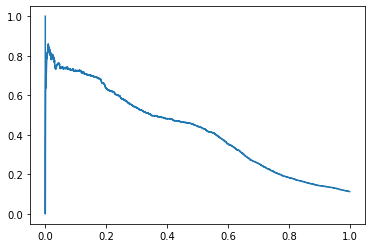

In [575]:
plt.plot(recalls, precisions);

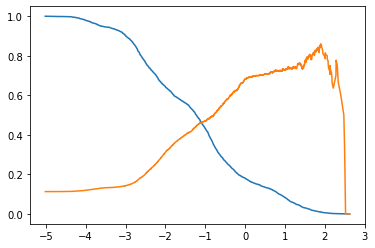

In [576]:
plt.plot(thresholds, recalls[:-1]);
plt.plot(thresholds, precisions[:-1]);

In [577]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores, pos_label='yes')

0.7821712400891389


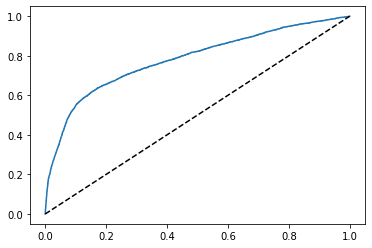

In [578]:
plt.plot(fpr, tpr);
plt.plot([0,1], [0,1], 'k--');
print(roc_auc_score(y_train, y_scores))